In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original = cv2.imread("1.jpg")  # Replace with the path to your image

1 First Values: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

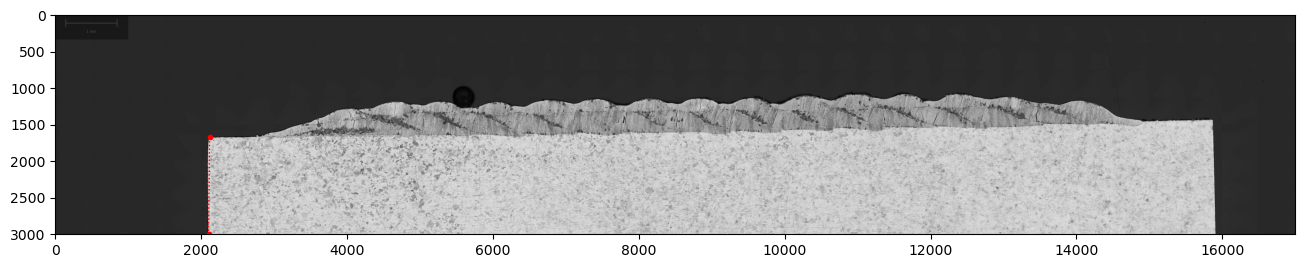

In [3]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 First Values:", first_values)

print("2 Coordinates:", coordinates)

num_first_values = len(first_values)
print("3 First Values Number Count:", num_first_values)

num_coordinates_count = len(coordinates)
print("4 Coordinates Number Count:", num_coordinates_count)

print("5 X Global Value:", first_values_x_global)

print("6 Y Global Value:", first_values_y_global)

print("7 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')